In [1]:
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
import pandas
import math 

[2.540e+02 0.000e+00 1.000e+00 ... 1.375e+03 1.200e+01 1.700e+01]


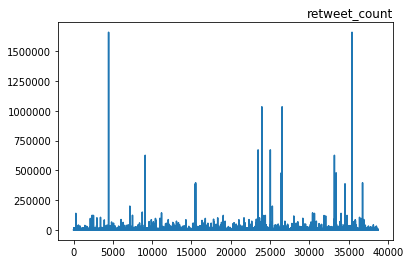

[814.   2.   0. ... 572.   0.  53.]


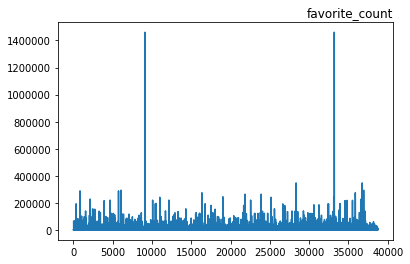

[4.30e+01 1.36e-01 3.64e-02 ... 4.30e+01 1.43e+00 1.43e+00]


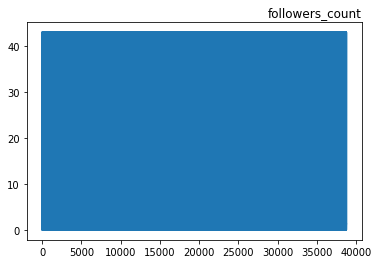

[4. 2. 4. ... 2. 3. 3.]


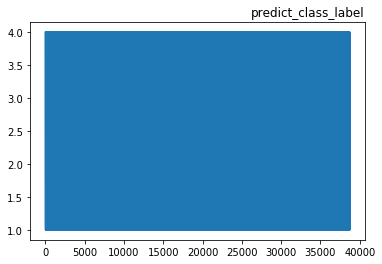

[[2.540e+02 8.140e+02 4.300e+01 4.000e+00]
 [0.000e+00 2.000e+00 1.360e-01 2.000e+00]
 [1.000e+00 0.000e+00 3.640e-02 4.000e+00]
 ...
 [1.375e+03 5.720e+02 4.300e+01 2.000e+00]
 [1.200e+01 0.000e+00 1.430e+00 3.000e+00]
 [1.700e+01 5.300e+01 1.430e+00 3.000e+00]]


In [34]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('DataSet.csv', header=0, index_col=0)
dataset.values
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    #pyplot.subplot(len(groups), 1, i)
    print(values[:, group])
    pyplot.plot(list(map(float,values[:, group])))
    pyplot.title(dataset.columns[group], y=1, loc='right')
    i += 1
    pyplot.show()
'''for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(dataset[:, group])
    pyplot.title(dataset.columns[group], y=1, loc='right')
    i += 1
pyplot.show()'''
print(values)

In [28]:
print(len(values))
print(values)
print(max(values[1]))

38734
[[2.540e+02 8.140e+02 4.300e+01 4.000e+00]
 [0.000e+00 2.000e+00 1.360e-01 2.000e+00]
 [1.000e+00 0.000e+00 3.640e-02 4.000e+00]
 ...
 [1.375e+03 5.720e+02 4.300e+01 2.000e+00]
 [1.200e+01 0.000e+00 1.430e+00 3.000e+00]
 [1.700e+01 5.300e+01 1.430e+00 3.000e+00]]
2.0


In [3]:
values[1]

array([0.   , 2.   , 0.136, 2.   ])

In [4]:
print (dataset.head())

            retweet_count  favorite_count  followers_count  \
Date_class                                                   
0                     254             814          43.0000   
4                       0               2           0.1360   
3                       1               0           0.0364   
1                      14               0           1.4300   
2                     685               0           0.4350   

            predict_class_label  
Date_class                       
0                             4  
4                             2  
3                             4  
1                             4  
2                             1  


In [5]:
print(type(dataset))
print((values))
print (float(values[0][0]))
type(values)

<class 'pandas.core.frame.DataFrame'>
[[2.540e+02 8.140e+02 4.300e+01 4.000e+00]
 [0.000e+00 2.000e+00 1.360e-01 2.000e+00]
 [1.000e+00 0.000e+00 3.640e-02 4.000e+00]
 ...
 [1.375e+03 5.720e+02 4.300e+01 2.000e+00]
 [1.200e+01 0.000e+00 1.430e+00 3.000e+00]
 [1.700e+01 5.300e+01 1.430e+00 3.000e+00]]
254.0


numpy.ndarray

In [6]:
dataset.values

array([[2.540e+02, 8.140e+02, 4.300e+01, 4.000e+00],
       [0.000e+00, 2.000e+00, 1.360e-01, 2.000e+00],
       [1.000e+00, 0.000e+00, 3.640e-02, 4.000e+00],
       ...,
       [1.375e+03, 5.720e+02, 4.300e+01, 2.000e+00],
       [1.200e+01, 0.000e+00, 1.430e+00, 3.000e+00],
       [1.700e+01, 5.300e+01, 1.430e+00, 3.000e+00]])

In [7]:
dataset.head()

,retweet_count,favorite_count,followers_count,predict_class_label
Date_class,,,,
0,254,814,43.0000,4
4,0,2,0.1360,2
3,1,0,0.0364,4
1,14,0,1.4300,4
2,685,0,0.4350,1


In [78]:
import pandas
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('DataSet.csv', header=0, index_col=0)
#print(dataset)
values = dataset.values
print(values)
print("--------------------------------------")

# integer encode direction
print("--------------------------------------")
'''
encoder = LabelEncoder()
values[:,2] = encoder.fit_transform(values[:,2])
print(values)
print("--------------------------------------")
print("--------------------------------------")
'''
# ensure all data is float
values = values.astype('float32')
print (values)
print("--------------------------------------")
print("--------------------------------------")

# normalize features



scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print("----------------------------")
print("----------------------------")
print(scaler)
print("----------------------------")
print("----------------------------")
print(scaled)
'''
normalized_X = preprocessing.normalize(values)
print("----------------------------")
print("----------------------------")
print ("Normalized x =",normalized_X)
print("----------------------------")
print("----------------------------")
'''
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
#reframed = series_to_supervised(normalized_X, 1, 1)


# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7,]], axis=1, inplace=True)
print(reframed.head())
print(float(values[2][0]))
print(float(scaled[2][0]))


[[2.540e+02 8.140e+02 4.300e+01 4.000e+00]
 [0.000e+00 2.000e+00 1.360e-01 2.000e+00]
 [1.000e+00 0.000e+00 3.640e-02 4.000e+00]
 ...
 [1.375e+03 5.720e+02 4.300e+01 2.000e+00]
 [1.200e+01 0.000e+00 1.430e+00 3.000e+00]
 [1.700e+01 5.300e+01 1.430e+00 3.000e+00]]
--------------------------------------
--------------------------------------
[[2.540e+02 8.140e+02 4.300e+01 4.000e+00]
 [0.000e+00 2.000e+00 1.360e-01 2.000e+00]
 [1.000e+00 0.000e+00 3.640e-02 4.000e+00]
 ...
 [1.375e+03 5.720e+02 4.300e+01 2.000e+00]
 [1.200e+01 0.000e+00 1.430e+00 3.000e+00]
 [1.700e+01 5.300e+01 1.430e+00 3.000e+00]]
--------------------------------------
--------------------------------------
----------------------------
----------------------------
MinMaxScaler(copy=True, feature_range=(0, 1))
----------------------------
----------------------------
[[1.5307881e-04 5.5719004e-04 1.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.3690172e-06 2.3182416e-03 3.3333334e-01]
 [6.0267251e-07 0.0000000e+00 0.0000

In [79]:
# split into train and test sets
from sklearn.model_selection import train_test_split
values = reframed.values
X=values[:, :-1]
y=values[:, -1]

train_X, test_X, train_y , test_y = train_test_split(X, y, test_size=0.33, random_state=42)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(25951, 1, 4) (25951,) (12782, 1, 4) (12782,)


In [80]:
test_X.shape

(12782, 1, 4)

Train on 25951 samples, validate on 12782 samples
Epoch 1/50
 - 2s - loss: 0.0016 - val_loss: 0.0011
Epoch 2/50
 - 1s - loss: 0.0011 - val_loss: 9.2780e-04
Epoch 3/50
 - 1s - loss: 0.0011 - val_loss: 0.0014
Epoch 4/50
 - 1s - loss: 0.0011 - val_loss: 0.0012
Epoch 5/50
 - 1s - loss: 0.0011 - val_loss: 8.7375e-04
Epoch 6/50
 - 1s - loss: 0.0012 - val_loss: 0.0012
Epoch 7/50
 - 1s - loss: 0.0010 - val_loss: 0.0013
Epoch 8/50
 - 1s - loss: 0.0010 - val_loss: 0.0010
Epoch 9/50
 - 1s - loss: 0.0011 - val_loss: 0.0010
Epoch 10/50
 - 1s - loss: 0.0011 - val_loss: 0.0011
Epoch 11/50
 - 1s - loss: 0.0010 - val_loss: 9.8694e-04
Epoch 12/50
 - 1s - loss: 0.0011 - val_loss: 0.0011
Epoch 13/50
 - 1s - loss: 0.0010 - val_loss: 9.8811e-04
Epoch 14/50
 - 1s - loss: 0.0010 - val_loss: 0.0012
Epoch 15/50
 - 1s - loss: 0.0011 - val_loss: 8.8907e-04
Epoch 16/50
 - 1s - loss: 0.0010 - val_loss: 9.2076e-04
Epoch 17/50
 - 1s - loss: 0.0011 - val_loss: 0.0013
Epoch 18/50
 - 1s - loss: 0.0010 - val_loss: 9.5027

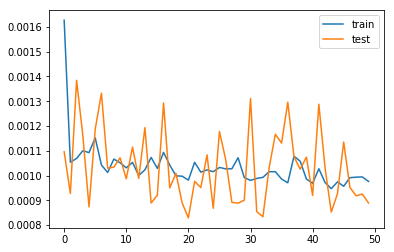

In [81]:
from tensorflow import keras as k
#from keras.utils.visualize_util import plot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
# design network
model = Sequential()

model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
#model.add(Flatten())
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, validation_split=0.33,epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [82]:
# make a prediction
from sklearn.metrics import mean_squared_error
import math 
yhat = model.predict(test_X)
print(yhat)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = pandas.concat((pandas.DataFrame(yhat), pandas.DataFrame(test_X[:, 1:])), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = pandas.concat((pandas.DataFrame(test_y), pandas.DataFrame(test_X[:, 1:])), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print ((inv_y))
print(inv_yhat)

print('Test RMSE: %.3f' % rmse)

[[2.2224232e-04]
 [4.5269291e-04]
 [4.5310264e-04]
 ...
 [3.6418648e-04]
 [8.7674940e-05]
 [2.7706055e-04]]
[ 44.99999896   2.           0.         ...   0.         758.00000962
  11.99999962]
[368.76133475 751.14245392 751.82229863 ... 604.28585385 145.47691804
 459.71990262]
Test RMSE: 19428.091


In [52]:
#print(list(map(float,yhat)))
print(float(yhat[0]))
print (inv_y)
print(inv_yhat)


0.0006098055164329708
[ 44.99999896   2.           0.         ...   0.         758.00000962
  11.99999962]
[1011.83561835 1615.86707371 1615.24411613 ... 1446.62562775  727.53593508
 1030.24676753]


In [ ]:
'''from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

inv_y = list(map(int,inv_y))
inv_yhat = list(map(int,inv_yhat))
conf_mat = confusion_matrix(inv_y, inv_yhat)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=dataset['retweet_count'].values, yticklabels=dataset['retweet_count'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()'''


In [ ]:
print ()
